# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Matthew Nathan Limahardja
- **Email:** nathanlimahardja@gmail.com
- **ID Dicoding:** nathan_limahardja

## Menentukan Pertanyaan Bisnis
- Bagaimana performa penjualan dalam beberapa bulan terakhir?
- Bagaimana setiap season mempengaruhi jumlah user?

## Import Semua Packages/Library yang Digunakan

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling
### Gathering Data

In [29]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai tabel `day_df`

In [31]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [32]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [37]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel `hour_df`

In [35]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [38]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [36]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada duplicate, missing values
- Data type masing masing kolom sudah benar kecuali dteday

### Cleaning Data

Merge `hour_df` & `day_df`

In [54]:
hour_day_df = pd.merge(
    hour_df,
    day_df,
    on='dteday',
    how='left',
    suffixes=("_hourly", "_daily")
)
hour_day_df.head()

,instant_hourly,dteday,season_hourly,yr_hourly,mnth_hourly,hr,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,...,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Fix `dteday` type

In [63]:
hour_day_df['dteday'] = pd.to_datetime(hour_day_df['dteday'])
hour_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant_hourly     17379 non-null  int64         
 1   dteday             17379 non-null  datetime64[ns]
 2   season_hourly      17379 non-null  int64         
 3   yr_hourly          17379 non-null  int64         
 4   mnth_hourly        17379 non-null  int64         
 5   hr                 17379 non-null  int64         
 6   holiday_hourly     17379 non-null  int64         
 7   weekday_hourly     17379 non-null  int64         
 8   workingday_hourly  17379 non-null  int64         
 9   weathersit_hourly  17379 non-null  int64         
 10  temp_hourly        17379 non-null  float64       
 11  atemp_hourly       17379 non-null  float64       
 12  hum_hourly         17379 non-null  float64       
 13  windspeed_hourly   17379 non-null  float64       
 14  casual

## Exploratory Data Analysis (EDA)

### Explore `hour_day_df`

In [64]:
hour_day_df.sample(5)

,instant_hourly,dteday,season_hourly,yr_hourly,mnth_hourly,hr,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,...,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily
15980,15981,2012-11-03,4,1,11,13,0,6,0,2,...,6,0,2,0.343333,0.323846,0.491250,0.270529,1029,4109,5138
13225,13226,2012-07-10,3,1,7,6,0,2,1,2,...,2,1,2,0.720833,0.664796,0.667500,0.151737,954,5336,6290
16059,16060,2012-11-06,4,1,11,20,0,2,1,1,...,2,1,1,0.280833,0.281567,0.567083,0.173513,466,5220,5686
13792,13793,2012-08-02,3,1,8,21,0,4,1,1,...,4,1,1,0.752500,0.707088,0.659583,0.129354,983,6278,7261
10752,10753,2012-03-29,2,1,3,3,0,4,1,1,...,4,1,1,0.494167,0.482304,0.439167,0.319650,834,5299,6133


In [148]:
season_hour_day_daily = hour_day_df.groupby(by="season_daily").agg({
    "casual_daily": "sum",
    "registered_daily": "sum",
    "cnt_daily":  "sum"
})

In [155]:
season_hour_day_hourly = hour_day_df.groupby(by="season_hourly").agg({
    "casual_hourly": "sum",
    "registered_hourly": "sum",
    "cnt_hourly":  "sum"
})

**Insight:**
- Season 3 paling ramai user
- Lebih banyak user yang tergistrasi tanpa nyewa

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dalam beberapa bulan terakhir?

In [108]:
day_6months_df = hour_day_df.groupby(
    pd.Grouper(key='dteday', freq='6MS')
).agg({
    "registered_daily": "sum",
    "cnt_daily": "sum",
    "casual_daily": "sum"
}).reset_index()

hour_6months_df = hour_day_df.groupby(
    pd.Grouper(key='dteday', freq='6MS')
).agg({
    "registered_hourly": "sum",
    "cnt_hourly": "sum",
    "casual_hourly": "sum"
}).reset_index()

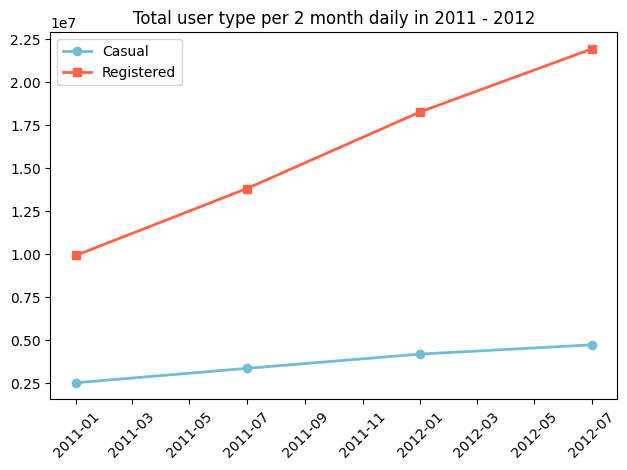

In [134]:
plt.plot(
    day_6months_df['dteday'],
    day_6months_df['casual_daily'],
    marker='o', 
    linewidth=2, 
    color="#72BCD4", 
    label="Casual"
)
plt.plot(
    day_6months_df['dteday'], 
    day_6months_df['registered_daily'], 
    marker='s',
    linewidth=2, 
    color="#FF6347", 
    label="Registered"
)

plt.title('Total user type per 2 month daily in 2011 - 2012')
plt.legend()
plt.xticks(rotation=45) 
plt.tight_layout()


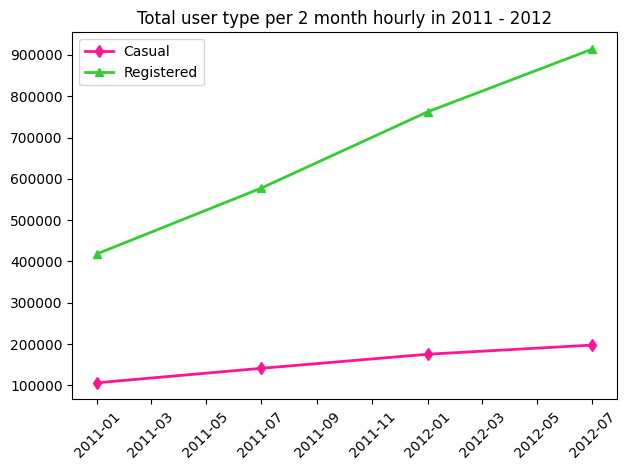

In [133]:
plt.plot(
    hour_6months_df['dteday'], 
    hour_6months_df['casual_hourly'], 
    marker='d',
    linewidth=2, 
    color="#FF1493", 
    label="Casual"
)
plt.plot(
    hour_6months_df['dteday'], 
    hour_6months_df['registered_hourly'], 
    marker='^',
    linewidth=2, 
    color="#32CD32", 
    label="Registered"
)

plt.title('Total user type per 2 month hourly in 2011 - 2012')
plt.legend()
plt.xticks(rotation=45) 
plt.tight_layout()


### Pertanyaan 2: Bagaimana setiap season mempengaruhi jumlah user?

Text(0.5, 23.52222222222222, '')

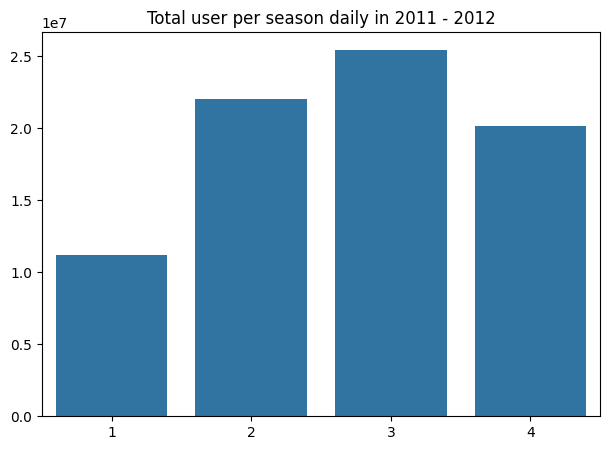

In [157]:
sns.barplot(
    y="cnt_daily", 
    x="season_daily",
    data=season_hour_day_daily
)

plt.title('Total user per season daily in 2011 - 2012')
plt.tight_layout()
plt.ylabel(None)
plt.xlabel(None)

Text(0.5, 23.52222222222222, '')

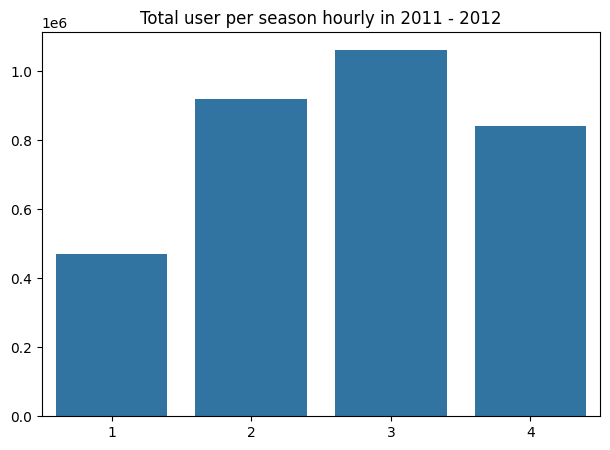

In [158]:
sns.barplot(
    y="cnt_hourly", 
    x="season_hourly",
    data=season_hour_day_hourly
)

plt.title('Total user per season hourly in 2011 - 2012')
plt.tight_layout()
plt.ylabel(None)
plt.xlabel(None)

**Insight:**
- Hourly dan daily berpola sama hanya berbeda nilai
- Lebih banyak orang yang registered

## Conclusion
- Kedua type user bertambah selama 2 tahun dengan registered user paling signifikan tinggi
- Di season 3 yaitu fall, banyak user yang menyewa sepeda dibanding musim lainnya